In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 
from pylab import rcParams
rcParams['figure.figsize'] = 20,15
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
#Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
#Проведите первичный анализ.
#Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками

In [3]:
# датасет
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# есть ? вместо значений. Удаляем ?
data.replace(['?'], [None], inplace=True)
data.dropna(inplace=True)
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [7]:
(48842-45222)/48842

0.07411653904426518

In [8]:
# потеряли 7 % данных

In [9]:
# Предложите альтернативный способ работы с пропусками
# вариант 1 -  заполнить пропуски на наиболее часто используемое значение в столбце - варианты заполнения ниже
data.mode()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,36,Private,203488,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [10]:
# вариант 2 -  заполнить пропуски на значение типа "нет данных" и строить модель с ними
# вариант 3 - попробовать удалить часть столбцов с пропусками из df

In [11]:
data = pd.read_csv('adult.csv')
data.replace(['?'], [None], inplace=True)
df = data.dropna(axis='columns')
df.head()

,age,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,capital-loss,hours-per-week,income
0,25,226802,11th,7,Never-married,Own-child,Black,Male,0,0,40,<=50K
1,38,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,0,50,<=50K
2,28,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,0,40,>50K
3,44,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,0,40,>50K
4,18,103497,Some-college,10,Never-married,Own-child,White,Female,0,0,30,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   fnlwgt           48842 non-null  int64 
 2   education        48842 non-null  object
 3   educational-num  48842 non-null  int64 
 4   marital-status   48842 non-null  object
 5   relationship     48842 non-null  object
 6   race             48842 non-null  object
 7   gender           48842 non-null  object
 8   capital-gain     48842 non-null  int64 
 9   capital-loss     48842 non-null  int64 
 10  hours-per-week   48842 non-null  int64 
 11  income           48842 non-null  object
dtypes: int64(6), object(6)
memory usage: 4.5+ MB


In [13]:
# было 14 столбцов. осталось 11. 
# Потеряли workclass, occupation, native-country, 
# occupation - достаточно важный столбец, не будем отказываться от него 

In [14]:
# учитывая, что выборка у нас достаточно большая оставим вариант с удалением 
# работаем с data

Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной 
(из графика можно сделать вывод об особенностях датасета/класса/признака)

In [15]:
# вычищаем некорректные данные
data.replace(['?'], [None], inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [16]:
df1 = data[data['income']=='<=50K']
df2 = data[data['income']=='>50K']

df1 = df1.groupby([df1['age'] ])[['income']].count()
df2 = df2.groupby([df2['age'] ])[['income']].count()
df1= df1.rename(columns = {'income':'<=50k'})
df2= df2.rename(columns = {'income':'>50k'})


<AxesSubplot:title={'center':'Доход и возраст '}, xlabel='age'>

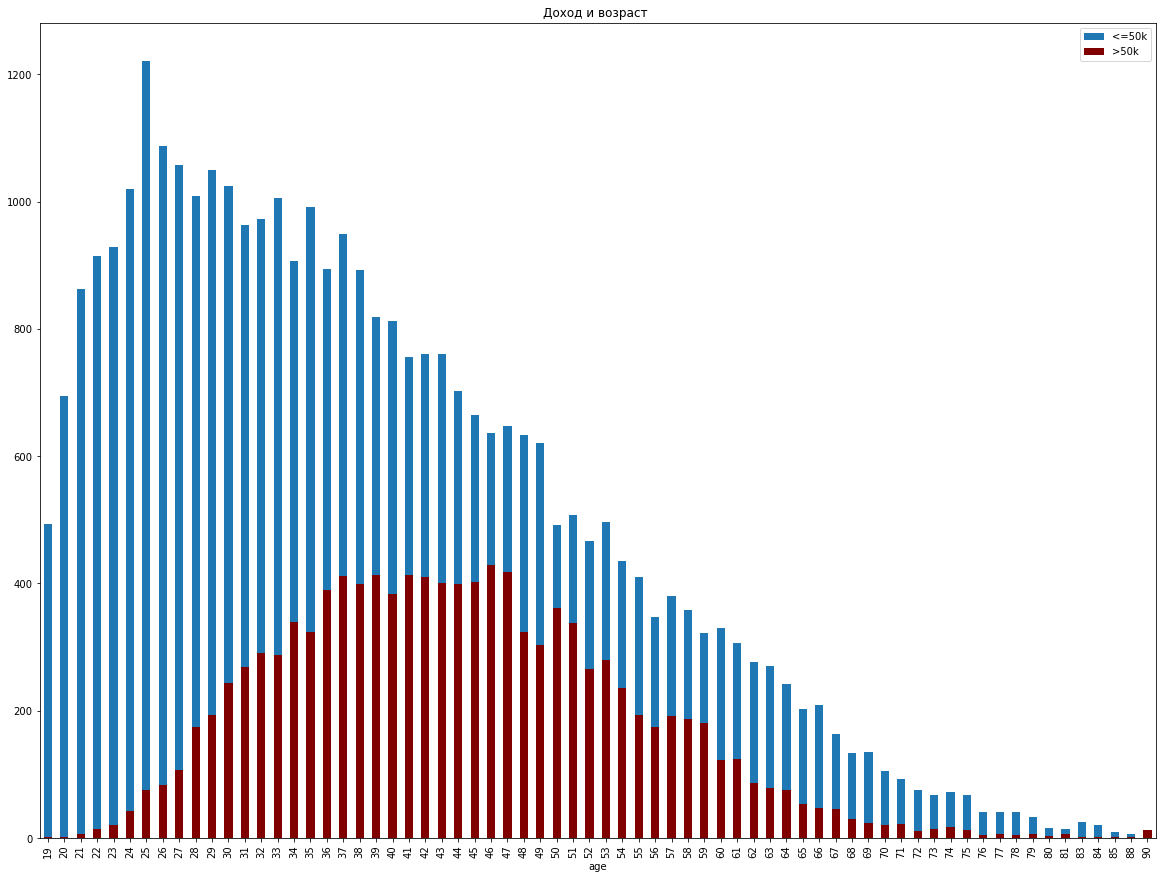

In [17]:
ax = df1.plot(kind="bar") 
# plotting age on the same axis 
df2.plot(kind="bar", ax=ax, color="maroon", title='Доход и возраст ') 


<AxesSubplot:title={'center':'Доход и занятость '}, xlabel='occupation'>

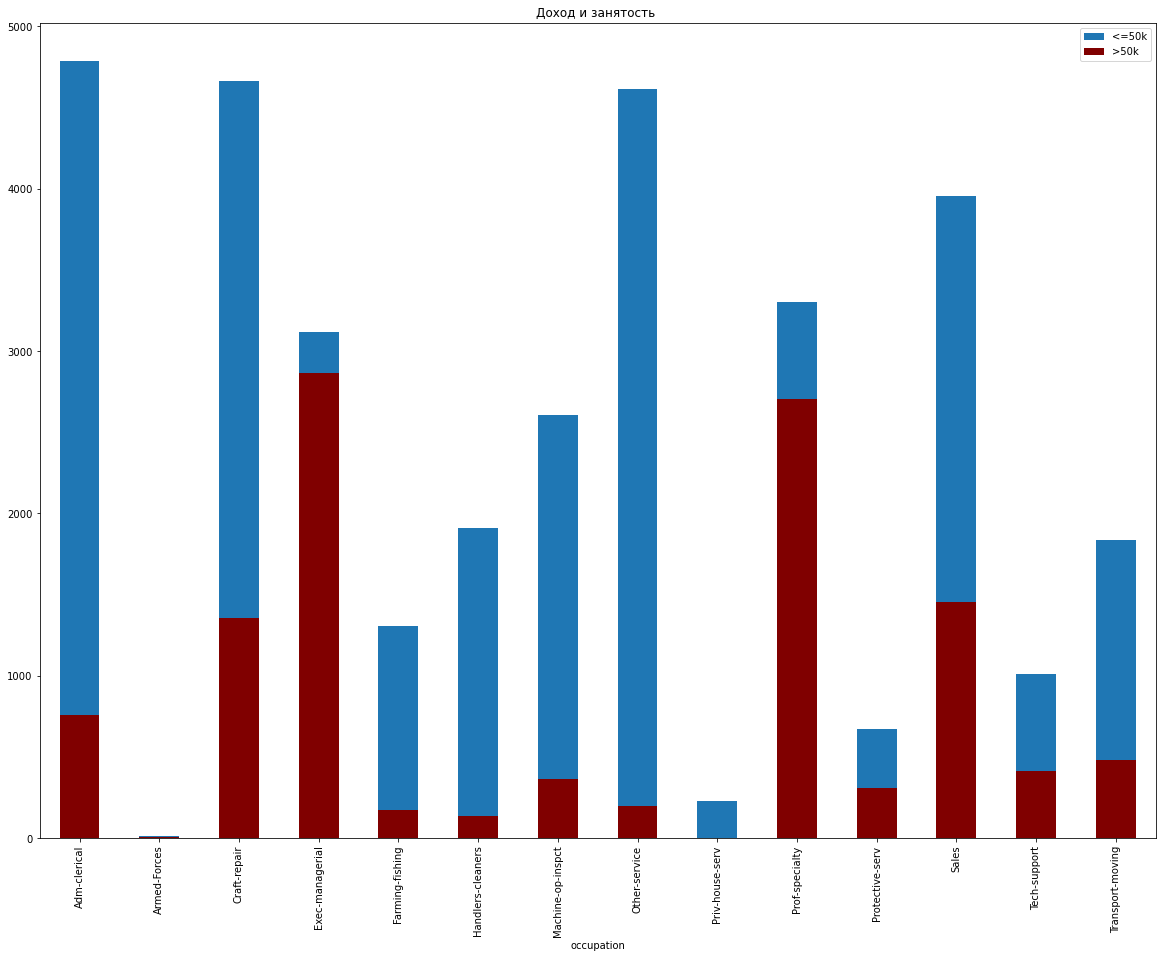

In [18]:
df1 = data[data['income']=='<=50K']
df2 = data[data['income']=='>50K']

df1 = df1.groupby([df1['occupation'] ])[['income']].count()
df2 = df2.groupby([df2['occupation'] ])[['income']].count()
df1= df1.rename(columns = {'income':'<=50k'})
df2= df2.rename(columns = {'income':'>50k'})
ax = df1.plot(kind="bar") 
# plotting age on the same axis 
df2.plot(kind="bar", ax=ax, color="maroon", title='Доход и занятость ') 

Преобразуйте категориальные признаки.
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

In [19]:
# вариант 1
selectedColumns = data[['age', 'education', 'gender', 'occupation', 'marital-status', 'race', 'relationship' ]]
#selectedColumns = data[['age', 'education', 'gender', 'occupation', 'marital-status']]

In [20]:
X = pd.get_dummies(selectedColumns, columns=['education', 'gender', 'occupation', 'marital-status', 'race' , 'relationship'])
#X = pd.get_dummies(selectedColumns, columns=['education', 'gender', 'occupation', 'marital-status'])

In [21]:
X

,age,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,...,race_Asian-Pac-Islander,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,38,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,28,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,34,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
48838,40,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
48839,58,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
48840,22,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [22]:
y = data[data.columns[-1]]
y.replace('>50K', 1, inplace=True)
y.replace('<=50K', 0, inplace=True)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [24]:
model = make_pipeline( StandardScaler(), LogisticRegression(max_iter=1000))

In [25]:
# обучаем на части датасета (train)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [26]:
model.predict_proba(X_test)

array([[0.98611153, 0.01388847],
       [0.37399592, 0.62600408],
       [0.68650187, 0.31349813],
       ...,
       [0.98730252, 0.01269748],
       [0.87639119, 0.12360881],
       [0.98987284, 0.01012716]])

In [27]:
model.score(X_train, y_train) 

0.8254968626475385

In [28]:
model.score(X_test,y_test)

0.8259812050856827

для логистической регрессии увеличение количества исходных признаков в модели приводит к некоторому улучшению предсказаний, 
после добавления в модель двух признаков marital-status' и 'race точность возрасла на 3%. Добавление страны и 
кол-ва рабочих часов в неделю не привело к улучшению модели.

In [29]:
# Опорные вектора
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [30]:
clf.score(X_train, y_train) 

0.8283992591978329

In [31]:
clf.score(X_test, y_test)

0.8239911553344389

In [32]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [33]:
svc.score(X_train, y_train)

0.8243359040274207

In [34]:
svc.score(X_test, y_test)

0.8267551133222775

для опорных векторов увеличение исходных признаков привело к улучшению прогноза примерно на 1%. При этом без StandardScaler 
получили более худший результат. Точность предсказания упала на 1 %


Результат предсказания получился под 83 % в логистической регресии. Но с увелечением исходных переменных качество предсказания в методе опорных вектров снизилось. Как вариант - увеличение переменных привело к увеличению шума и искажению предсказания.
Для улучшения предсказания можно попробовать использовать БД с большей выборкой или более репрезентативные данные. После перебора различных вариантов исходных переменных в модели, понял, что неполохо бы иметь инструмент, которй позволяет оценить необходимость использования тех или иных данных в модели. Пошел читать букварь.